# 타이타닉 데이터 분석

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline
titanic = pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 데이터 파악 및 전처리

### 컬럼별 의미

- PassengerId: 승객에게 부여된 고유 번호
- Survived: 생존 여부 (0 = 사망, 1 = 생존)
- Pclass: 객실 등급(class)
- Name: 승객 이름 (타이틀(Mr, Mrs, Miss 등)이 포함됨)
- Sex: 성별 (male, female)
- Age: 나이 (0.42 = 생후 약 5개월) -> 결측치 많음 (714명만 존재)
- SibSp: 함께 탑승한 형제/자매 + 배우자 수 (Sib=Sibling(형제자매), Sp=Spouse(배우자))
- Parch: 함께 탑승한 부모 + 자녀 수 (Par=Parent, ch=Child)
- Ticket: 티켓 번호 (승객 간 티켓 공유하는 경우도 있음)
- Fare: 티켓 가격 (돈 많이 낸 사람 ≈ 등급 높은 객실)
- Cabin: 선실 번호 -> 결측치 가장 많음 (204명만 정보 있음)
- Embarked: 탑승 항구 (C=Cherbourg, Q=Queenstown, S=Southampton(가장 많음)) -> 결측치 존재 (2건)

In [66]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 기술통계 (수치형, 범주형 전체) 
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 중복 확인

In [ ]:
# 완전 중복 행 수 (없음)
titanic.duplicated().sum()

np.int64(0)

## 이상치 확인

### 왜도와 첨도
- **왜도가 크면(>1)** → 로그 변환 고려
- **첨도가 크면(>3)** → 이상치 처리 필요

### 티켓 요금(Fare) 분포

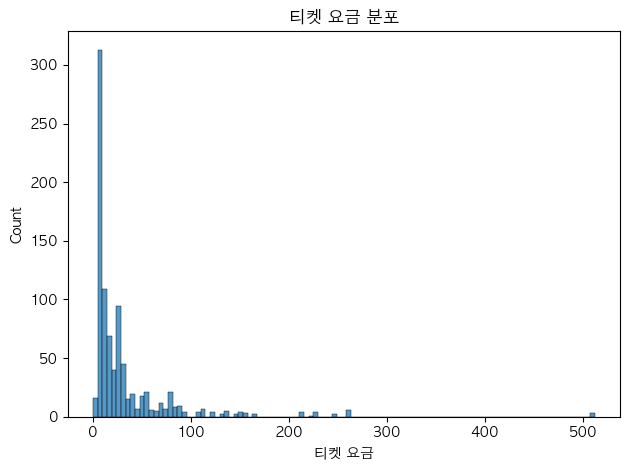

In [68]:
# 티켓 요금(Fare) 히스토그램
sns.histplot(data=titanic, x=titanic['Fare'])
plt.title('티켓 요금 분포')
plt.xlabel('티켓 요금')
plt.tight_layout()
plt.show()

In [ ]:
# 왜도 (판다스 방식) : 왜도 4.78 → 오른쪽으로 아주 길게 늘어짐 (평균·표준편차 사용 부적절) → 로그 변환(log1p) 필요
titanic['Fare'].skew()

np.float64(4.787316519674893)

In [ ]:
# 왜도 (SciPy 방식, 대부분의 데이터는 표본이므로 bias=False해 줘야 함)

from scipy import stats

stats.skew(titanic['Fare'], bias=False)

np.float64(4.787316519674893)

In [81]:
# 첨도 (판다스 방식) : 첨도 33.39 → 극단값(아웃라이어) 엄청 많음 (평균·표준편차 사용 부적절) → 로그 변환(log1p) 필요
titanic['Fare'].kurtosis()

np.float64(33.39814088089868)

In [84]:
# 첨도 (SciPy 방식, 대부분의 데이터는 표본이므로 bias=False해 줘야 함)

from scipy import stats

stats.kurtosis(titanic['Fare'], bias=False)

np.float64(33.39814088089869)

## 로그 변환

In [2]:
# 티켓 요금(Fare) 로그 변환 (권장 방식)
titanic = titanic.assign(Fare_log=np.log1p(titanic['Fare']))
 
print("Fare skew:", stats.skew(titanic["Fare"].dropna(), bias=False)) # bias=False → 표본 편향 조정
print("Fare kurt:", stats.kurtosis(titanic["Fare"].dropna(), bias=False))

Fare skew: 4.787316519674893
Fare kurt: 33.39814088089869


In [ ]:
# 티켓 요금(Fare) 로그 변환 (좀 더 실무적인 방식)
titanic['Fare_log'] = np.log1p(titanic['Fare'])

# 원본 Fare 분포 왜도/첨도
fare_no_na = titanic["Fare"].dropna()
print("Fare skew:", stats.skew(fare_no_na, bias=False))
print("Fare kurt:", stats.kurtosis(fare_no_na, bias=False))

# 로그 변환 후 값 확인
fare_log_no_na = titanic["Fare_log"].dropna()
print("Fare_log skew:", stats.skew(fare_log_no_na, bias=False))
print("Fare_log kurt:", stats.kurtosis(fare_log_no_na, bias=False))

Fare skew: 4.787316519674893
Fare kurt: 33.39814088089869
Fare_log skew: 0.39492800951893064
Fare_log kurt: 0.9761421066831053


In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.433987


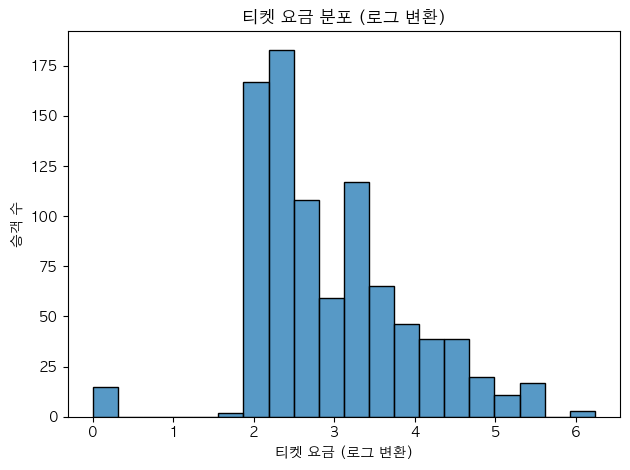

In [3]:
# 로그 변환 후 티켓 요금 분포
sns.histplot(titanic['Fare_log'], bins=20, kde=False, stat='count')
plt.title('티켓 요금 분포 (로그 변환)')
plt.xlabel('티켓 요금 (로그 변환)')
plt.ylabel('승객 수')
plt.tight_layout()
plt.show()

## 결측치 처리

- 결측률 5% 이하면 단순 대치
- 결측률 5% 이상이면 통계 점검
    - **MCAR(완전 무작위)**: 정말 랜덤하게 빠짐(복권처럼) → 단순 대치/삭제가 비교적 안전
    - **MAR(관측변수 의존)**: “보이는 어떤 변수” 때문(예: 남성일수록 소득 결측 ↑) → 그 변수를 고려해 대치
    - **MNAR(비관측 의존)**: “보이지 않는 이유”(예: 소득이 낮아서 일부러 기입 안 함) → 지표 추가+보수적 해석

In [4]:
# 컬럼별 결측률 → Cabin과 Age, Embarked 결측치 처리 필요
titanic.isna().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Fare_log       0.000000
dtype: float64

In [5]:
titanic['Cabin'].isna().sum()

np.int64(687)

In [7]:
titanic['Age'].isna().sum()

np.int64(177)

In [8]:
titanic['Embarked'].isna().sum()

np.int64(2)

### (1) Embarked 결측치 처리

In [61]:
# Embarked 값 분포 확인
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
# 결측률 5% 이하이므로 단순 대치 -> 최빈값(S)으로 채우기
titanic['Embarked_fill'] = titanic['Embarked'].fillna('S')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log,Embarked_fill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2.639057,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.433987,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3.196630,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.433987,C


In [10]:
titanic['Embarked'].isna().sum()

np.int64(2)

In [11]:
titanic['Embarked_fill'].isna().sum()

np.int64(0)

### 질문. Cabin과 Age 결측치는 MCAR(완전 무작위)인가, MAR(어떤 변수에 의해 영향을 받음) 인가?

### (2) Cabin(선실 번호) 결측치 처리

In [ ]:
# Cabin 결측지표 만들기
# Cabin_miss = 0 → Cabin 값 있음
# Cabin_miss = 1 → Cabin 값 없음
titanic['Cabin_miss'] = titanic['Cabin'].isna().astype(int)
titanic['Cabin_miss']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_miss, Length: 891, dtype: int64

In [23]:
# Cabin-수치형 변수와의 차이(티켓 요금 분포와 다른가?) → t-test (평균 차이 검정)
obs = titanic.loc[titanic["Cabin_miss"]==0, "Fare"].dropna()
mis = titanic.loc[titanic["Cabin_miss"]==1, "Fare"].dropna()
_, p_age = stats.ttest_ind(obs, mis, equal_var=False, nan_policy='omit')
p_age

np.float64(7.974017535465968e-22)

In [ ]:
# Cabin-수치형 변수와의 차이(티켓 요금(로그 변환) 분포와 다른가?) → t-test (평균 차이 검정)
obs = titanic.loc[titanic["Cabin_miss"]==0, "Fare_log"].dropna()
mis = titanic.loc[titanic["Cabin_miss"]==1, "Fare_log"].dropna()
_, p_age = stats.ttest_ind(obs, mis, equal_var=False, nan_policy='omit')
p_age

np.float64(3.017711083535549e-46)

In [ ]:
# Cabin-수치형 변수와의 차이(객실 등급 분포와 다른가?) → t-test (평균 차이 검정)
obs = titanic.loc[titanic["Cabin_miss"]==0, "Pclass"].dropna()
mis = titanic.loc[titanic["Cabin_miss"]==1, "Pclass"].dropna()
_, p_age = stats.ttest_ind(obs, mis, equal_var=False, nan_policy='omit')
p_age

np.float64(1.5510925101271275e-113)

In [ ]:
# Cabin 존재 여부에 따른 Pclass 분포 확인
# Cabin_miss: 0 = Cabin 있음, 1 = Cabin 없음
pd.crosstab(titanic['Cabin_miss'], titanic['Pclass'], normalize='index') * 100

Pclass,1,2,3
Cabin_miss,,,
0,86.274510,7.843137,5.882353
1,5.822416,24.454148,69.723435


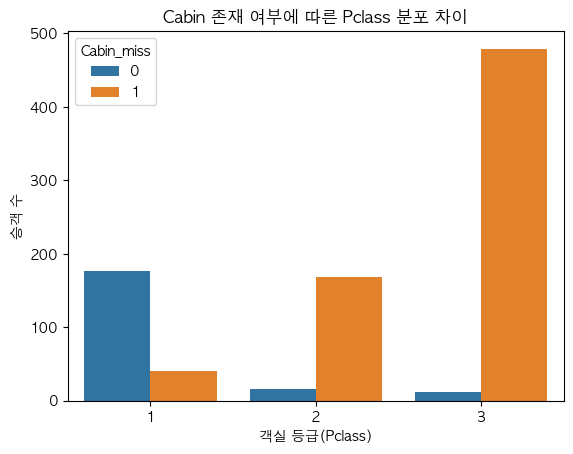

In [ ]:
# Cabin 존재 여부에 따른 Pclass 분포 시각화
sns.countplot(data=titanic, x='Pclass', hue='Cabin_miss')
plt.xlabel('객실 등급(Pclass)')
plt.ylabel('승객 수')
plt.title('Cabin 존재 여부에 따른 Pclass 분포 차이')
plt.show()

In [ ]:
# 범주형 변수와의 연관(티켓 번호·탑승 항구과 관련?) → 카이제곱 (범주 vs 결측: 티켓 번호·탑승 항구와의 연관성 검정)
pvals = {}
for col in ['Ticket', 'Embarked']:
    cont = pd.crosstab(titanic["Cabin_miss"], titanic[col])
    chi2, p, *_ = stats.chi2_contingency(cont)
    pvals[col] = p
p_age, pvals

(np.float64(6.807219771449342e-08),
 {'Ticket': np.float64(5.148434664422503e-06),
  'Embarked': np.float64(3.1825652195394244e-11)})

In [ ]:
# Cabin 있고/없는 사람들은 어느 항구 출신인지
pd.crosstab(titanic["Cabin_miss"], titanic["Embarked"], normalize='index') * 100

Embarked,C,Q,S
Cabin_miss,,,
0,34.158416,1.980198,63.861386
1,14.410480,10.625910,74.963610


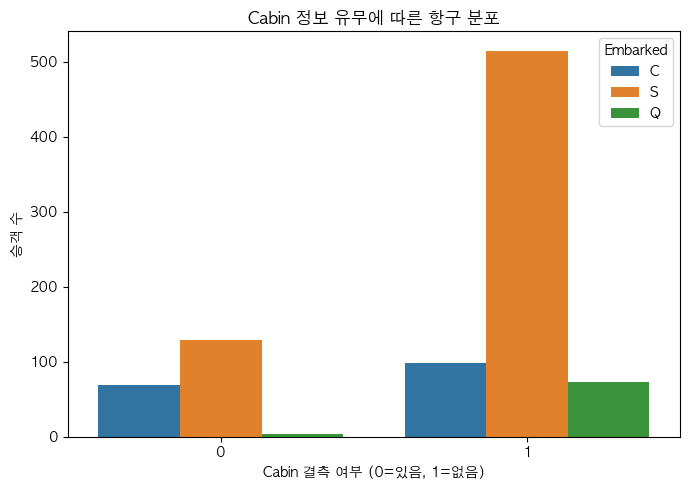

In [ ]:
# Cabin 정보 유무에 따른 항구 분포 그래프
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.countplot(data=titanic, x='Cabin_miss', hue='Embarked')
plt.title('Cabin 정보 유무에 따른 항구 분포')
plt.xlabel('Cabin 결측 여부 (0=있음, 1=없음)')
plt.ylabel('승객 수')
plt.legend(title='Embarked')
plt.tight_layout()
plt.show()

In [38]:
# 가장 많은 승객이 탑승한 항구 S > C > Q
titanic[['Embarked']].value_counts()

Embarked
S           644
C           168
Q            77
Name: count, dtype: int64

In [ ]:
# 탑승 항구별 객실 등급, Cabin 존재 여부 분포
titanic[['Embarked', 'Pclass', 'Cabin_miss']].value_counts()

Embarked  Pclass  Cabin_miss
S         3       1             343
          2       1             151
          1       0             106
Q         3       1              71
C         1       0              66
          3       1              65
S         1       1              21
C         1       1              19
          2       1              15
S         2       0              13
          3       0              10
Q         1       0               2
C         2       0               2
Q         2       1               2
                  0               1
          3       0               1
C         3       0               1
Name: count, dtype: int64

#### 해석

- S 항구(Southampton) 승객이 가장 많기에, Cabin 결측치도 가장 많음
  - 3등석 + Cabin(선실 번호) 결측이 압도적 
  - 1등석은 Cabin 기록이 가장 잘 되어 있음(106명)
- Q 항구(Queenstown) 승객은 거의 전원이 Cabin 정보 없음
  - S 항구 다음으로 3등석 비중이 많고 + Cabin(선실 번호) 결측 비중이 높음
- C 항구(Cherbourg)는 1등석 + Cabin 있음이 많음

In [37]:
titanic.groupby('Embarked')['Pclass'].mean()

Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64

#### 결론

- Cabin 결측 여부는 요금, 객실 등급, 탑승 항구, 티켓 번호 형태와 강하게 관련되어 있음
  - Cabin 결측은 "MNAR + MAR가 섞인 복합 결측"
    - 해당 객실 특성 때문에 원래 번호가 없는 상황 → MNAR
    - 다른 변수에 의해 결측이 예측될 수 있는 패턴 → MAR  
- 따라서 결측 자체가 중요한 의미이므로 그냥 두자!
  - 추후 머신러닝 모델링 시 Cabin 컬럼은 삭제하고, 결측 여부만 사용

### (3) Age 결측치 처리

In [ ]:
# Age 결측지표 만들기
titanic['Age_miss'] = titanic['Age'].isna().astype(int)
titanic['Age_miss']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: Age_miss, Length: 891, dtype: int64

In [ ]:
# Age-수치형 변수와의 차이(티켓 요금(로그 변환) 분포와 다른가?) → t-test (평균 차이 검정)
obs = titanic.loc[titanic["Age_miss"]==0, "Fare_log"].dropna()
mis = titanic.loc[titanic["Age_miss"]==1, "Fare_log"].dropna()
_, p_age = stats.ttest_ind(obs, mis, equal_var=False, nan_policy='omit')
p_age

np.float64(1.369175586859002e-06)

In [ ]:
# Age-수치형 변수와의 차이(객실 등급 분포와 다른가?) → t-test (평균 차이 검정)
obs = titanic.loc[titanic["Age_miss"]==0, "Pclass"].dropna()
mis = titanic.loc[titanic["Age_miss"]==1, "Pclass"].dropna()
_, p_age = stats.ttest_ind(obs, mis, equal_var=False, nan_policy='omit')
p_age

np.float64(6.807219771449342e-08)

In [ ]:
# Age-범주형 변수와의 연관(티켓 번호·탑승 항구과 관련?) → 카이제곱 (범주 vs 결측: 티켓 번호·탑승 항구와의 연관성 검정)
pvals = {}
for col in ['Ticket', 'Embarked']:
    cont = pd.crosstab(titanic["Age_miss"], titanic[col])
    chi2, p, *_ = stats.chi2_contingency(cont)
    pvals[col] = p
p_age, pvals

(np.float64(6.807219771449342e-08),
 {'Ticket': np.float64(7.40852139679826e-05),
  'Embarked': np.float64(4.9505903973894276e-24)})

In [47]:
# Age 있고/없는 사람들은 어느 항구 출신인지
pd.crosstab(titanic["Age_miss"], titanic["Embarked"], normalize='index') * 100

Embarked,C,Q,S
Age_miss,,,
0,18.258427,3.932584,77.808989
1,21.468927,27.683616,50.847458


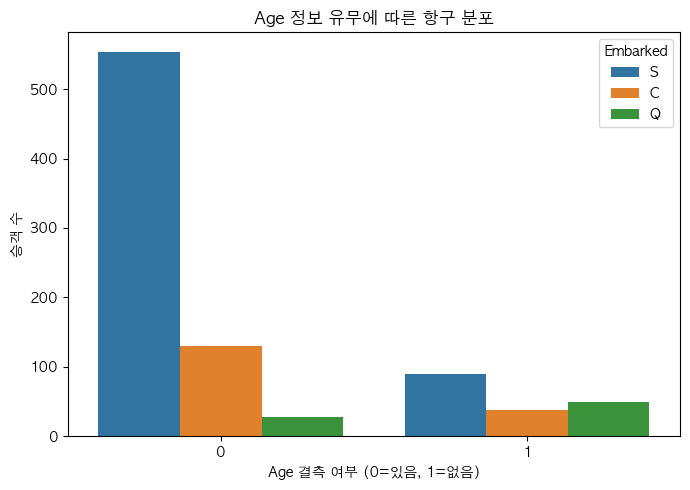

In [48]:
# Age 정보 유무에 따른 항구 분포 그래프
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.countplot(data=titanic, x='Age_miss', hue='Embarked')
plt.title('Age 정보 유무에 따른 항구 분포')
plt.xlabel('Age 결측 여부 (0=있음, 1=없음)')
plt.ylabel('승객 수')
plt.legend(title='Embarked')
plt.tight_layout()
plt.show()

In [51]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
# 탑승 항구별 객실 등급, Age 존재 여부 분포
titanic[['Embarked', 'Pclass', 'Age_miss']].value_counts()

Embarked  Pclass  Age_miss
S         3       0           290
          2       0           156
          1       0           108
C         1       0            74
S         3       1            63
Q         3       1            48
C         3       0            41
                  1            25
Q         3       0            24
S         1       1            19
C         2       0            15
          1       1            11
S         2       1             8
Q         1       0             2
          2       0             2
C         2       1             2
Q         2       1             1
Name: count, dtype: int64

#### 해석

- Age 결측률이 가장 높은 그룹은 Q 항구 × 3등석 → 77명 중 48명 (약 62% 결측)
- 그다음 Age 결측 많은 그룹은 S 항구 × 3등석 → 644명 중 63명 (약 10% 결측)
- 1등석은 대부분 Age 기록이 잘 되어 있음

#### 결론

- Age 결측 여부는 요금, 객실 등급, 탑승 항구, 티켓 번호 형태와 강하게 관련되어 있음
  - Age 결측은 다른 변수에 의해 결측이 예측될 수 있는 패턴
  - “기록하는 과정의 차이” 때문이지 “그 그룹의 나이가 특별해서”는 아님 (결측 자체에 고유 의미는 없음)
  - 즉, 나이가 없는 승객은 없고, 기록 과정에서 누락된 것 (단순한 값 손실) → MAR
- 생존 분석에서 Age는 중요한 변수이므로, Age 결측치는 중앙값(또는 그룹별 중앙값)으로 채우는 게 합리적

In [16]:
# Age 결측치 처리 -> Embarked + Pclass 조합별 중앙값으로 대체
titanic['Age_fill'] = titanic['Age'].fillna(
    titanic.groupby(['Embarked', 'Pclass'])['Age'].transform('median')
)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log,Embarked_fill,Age_fill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2.639057,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.433987,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3.196630,S,25.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.433987,C,26.0


In [13]:
titanic['Age'].isna().sum()

np.int64(177)

In [17]:
titanic['Age_fill'].isna().sum()

np.int64(0)

## EDA

In [ ]:
# 고유값 개수
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
titanic['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [ ]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
cond = titanic[(titanic['Pclass']==1) & (titanic['Sex']=='female') & (titanic['Survived']==1)]
cond

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [ ]:
count = len(cond)
ratio = len(cond) / len(titanic) * 100
print(f'1등석 여성 생존자는 {count}명이며, 전체 승객의 {ratio:.1f}%에 해당한다.')

1등석 여성 생존자는 91명이며, 전체 승객의 10.2%에 해당한다.


## 실습 과제

### 문제 1.

- 질문 : 성별(`sex`)에 따라 **생존률(`survived`)**이 달랐는가?
- 문제 : 성별별 생존률 비교
- 권장 그래프 : 범주×연속[0/1] → 막대그래프 → `barplot`
- **왜 이 그래프?** 이진변수 평균이 곧 **비율**이므로 막대 높이가 바로 생존률을 의미

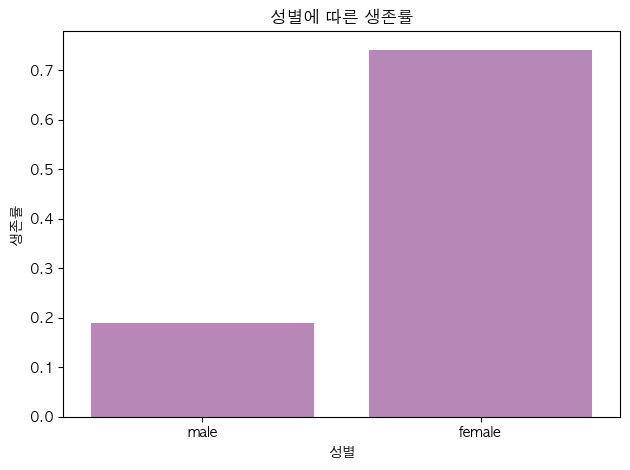

In [ ]:
sns.barplot(data=titanic, x='Sex', y='Survived', color='purple', alpha=0.5, errorbar=None)
plt.title("성별에 따른 생존률")
plt.xlabel("성별")
plt.ylabel("생존률")
plt.tight_layout()
plt.show()

In [ ]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### 문제 2.

- 질문 : 객실 등급(`class`)에 따라 **요금(`fare`)** 분포는 어떻게 다른가?
- 문제 : 객실 등급별 요금 분포
- 권장 그래프 : 범주×연속 → 박스/바이올린 → `boxplot` 또는 `violinplot`
- **왜 이 그래프?** 평균 막대만 보이면 outlier 영향이 큼. **중앙값·사분위·이상치**까지 한 번에 확인 가능.

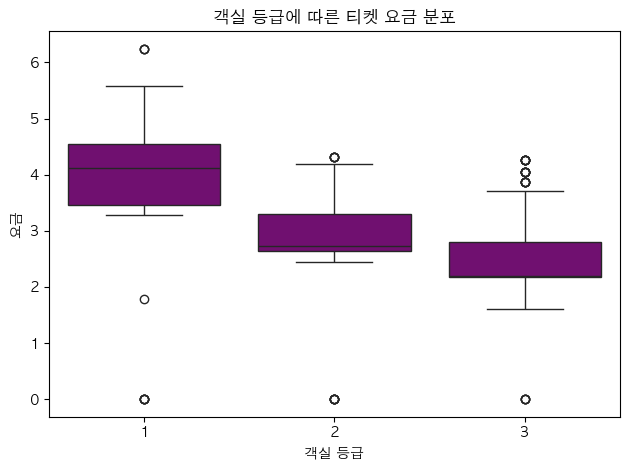

In [ ]:
sns.boxplot(data=titanic, x='Pclass', y='Fare_log', color='purple')
plt.title("객실 등급에 따른 티켓 요금 분포")
plt.xlabel("객실 등급")
plt.ylabel("요금")
plt.tight_layout()
plt.show()

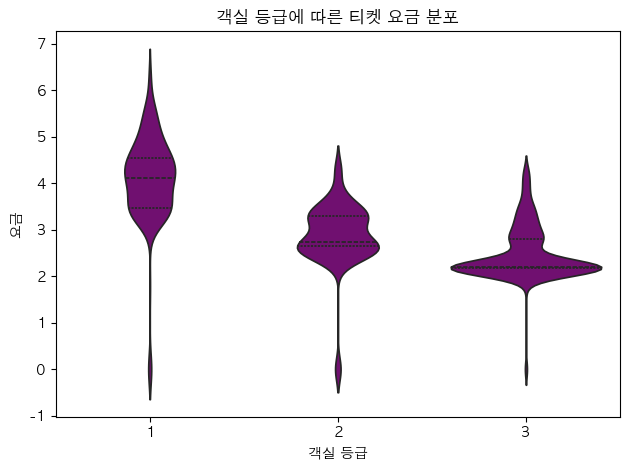

In [79]:
sns.violinplot(data=titanic, x='Pclass', y='Fare_log', color='purple', inner='quartile')
plt.title("객실 등급에 따른 티켓 요금 분포")
plt.xlabel("객실 등급")
plt.ylabel("요금")
plt.tight_layout()
plt.show()

### 문제 3.

- 질문 : 승객 **나이(`age`)**는 어떤 분포인가?
- 문제 : 나이 분포 파악
- 권장 그래프 : 연속 단변량 → 히스토그램 → `histplot`(+KDE)
- **왜 이 그래프?** 연속형 1개 변수의 **분포 모양**(봉우리, 꼬리, 다봉성) 파악에 최적

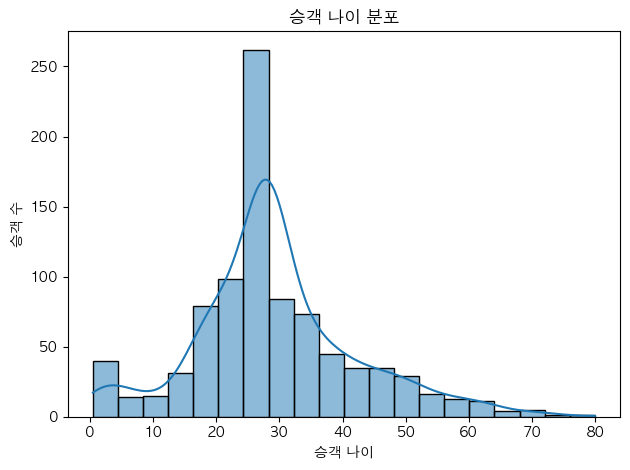

In [ ]:
# Age_fill(결측치 중앙값 대체) 기준
sns.histplot(data=titanic, x='Age_fill', bins=20, kde=True)
plt.title("승객 나이 분포")
plt.xlabel("승객 나이")
plt.ylabel("승객 수")
plt.tight_layout()
plt.show()

In [59]:
titanic['Age_fill'].sort_values().value_counts()

Age_fill
28.00    202
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
20.50      1
14.50      1
12.00      1
0.92       1
80.00      1
Name: count, Length: 88, dtype: int64

### 문제 4.

- 질문 : **나이(`age`)**와 **요금(`fare`)** 사이에 어떤 패턴이 있는가?
- 문제 : **나이 vs 요금** 관계
- 권장 그래프 : 연속×연속 → 산점도 → `scatterplot` (+ `hue="survived"`)
- **왜 이 그래프?** 두 연속형의 **상관/클러스터/이상치**를 점 구름으로 쉽게 확인 가능

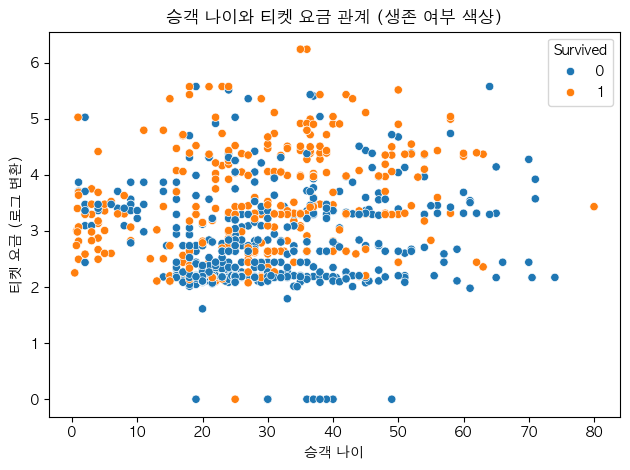

In [22]:
sns.scatterplot(data=titanic, x='Age_fill', y='Fare_log', hue="Survived")
plt.title("승객 나이와 티켓 요금 관계 (생존 여부 색상)")
plt.xlabel("승객 나이")
plt.ylabel("티켓 요금 (로그 변환)")
plt.tight_layout()
plt.show()

### 문제 5.

- 질문 : 객실 등급(`class`)에 따라 **생존률**이 어떻게 달랐는가?
- 문제 : 등급×생존 비율
- 권장 그래프 : 범주×범주 → 히트맵 → 교차표(`crosstab`) **행 기준 비율** → `heatmap`
- **왜 이 그래프?** **비율**을 색으로 표시하면 등급 간 차이를 **한눈에** 비교 가능

In [ ]:
# 객실 등급에 따른 생존률 교차표
cs = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index') *100
cs

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


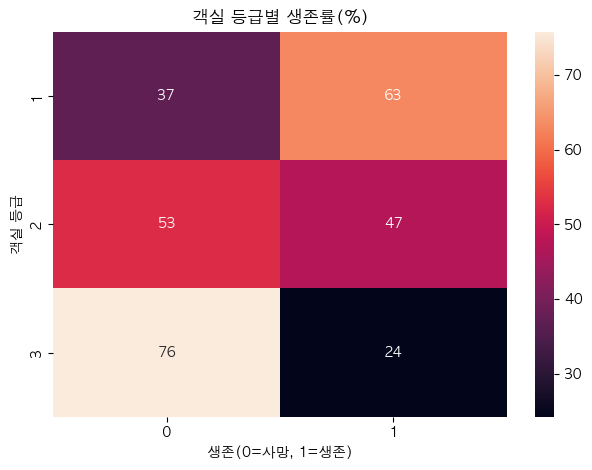

In [80]:
# 히트맵
sns.heatmap(cs, annot=True, fmt='.0f')
plt.title("객실 등급별 생존률(%)")
plt.xlabel("생존(0=사망, 1=생존)")
plt.ylabel("객실 등급")
plt.tight_layout()
plt.show()

### 문제 6.

- 질문 : 탑승항(`embarked`)별 **승객 수**와 **생존률**을 각각 어떻게 보여줄까?
- 문제 : 탑승항별 인원 & 생존률
- 권장 그래프 : 두 시각화 비교 → `countplot`(개수) + `barplot(y='survived')`(비율)
- **왜 이 그래프?** **개수**와 **비율**은 다른 질문. 각각 최적 그래프가 다름

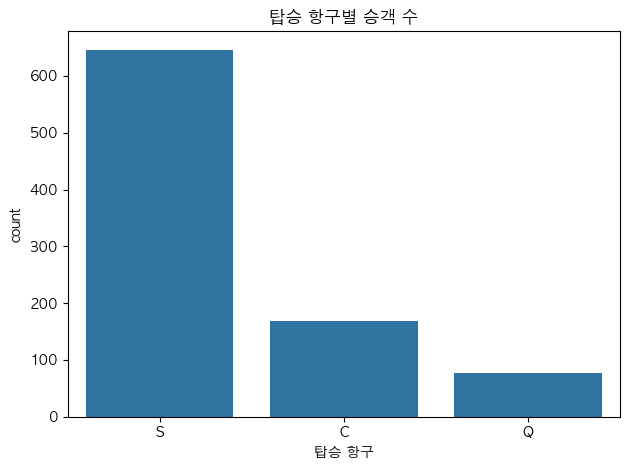

In [56]:
sns.countplot(data=titanic, x='Embarked_fill')
plt.title("탑승 항구별 승객 수")
plt.xlabel("탑승 항구")
plt.tight_layout()
plt.show()

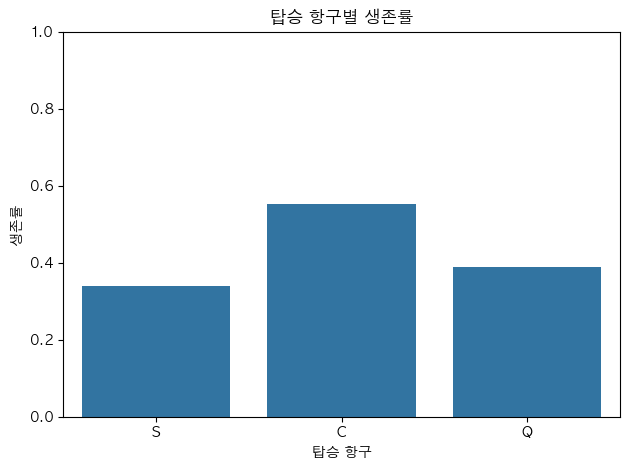

In [57]:
# 탑승 항구별 생존률
sns.barplot(data=titanic, x='Embarked_fill', y='Survived', errorbar=None)
plt.title("탑승 항구별 생존률")
plt.xlabel("탑승 항구")
plt.ylabel("생존률")
plt.ylim(0,1) # y축 값이 생존률(=확률)이므로 0~1 사이
plt.tight_layout()
plt.show()

### 문제 7.

- 질문 : Titanic의 **수치형 변수들끼리 관계(상관)**를 한눈에 파악하려면 어떻게 보여줄까?
- 문제 : 수치형 컬럼만 골라 **피어슨 상관행렬** 계산 후 **히트맵**으로 시각화
- 권장 그래프 : 상관행렬 → `heatmap`
- **왜 이 그래프?** 여러 수치 변수의 **쌍별 상관(-1~1)**을 **색과 수치**로 직관적으로 비교할 수 있음.

In [70]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Fare_log       891 non-null    float64
 13  Embarked_fill  891 non-null    object 
 14  Age_fill       891 non-null    float64
dtypes: float64(4), int64(5), object(6)
memory usage: 104.5+ KB


In [ ]:
# 수치형 컬럼들의 상관행렬
# 간단하게는 num = titanic.select_dtypes(include="number")
# 여기서는 전처리한 컬럼과 중복되지 않게 수치형 변수들 직접 지정
num = titanic[['Survived','Pclass', 'SibSp', 'Parch', 'Fare_log', 'Age_fill']]
corr = num.corr()
corr

,Survived,Pclass,SibSp,Parch,Fare_log,Age_fill
Survived,1.000000,-0.338481,-0.035322,0.081629,0.329862,-0.048299
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.661022,-0.415917
SibSp,-0.035322,0.083081,1.000000,0.414838,0.318528,-0.234513
Parch,0.081629,0.018443,0.414838,1.000000,0.332186,-0.164996
Fare_log,0.329862,-0.661022,0.318528,0.332186,1.000000,0.151700
Age_fill,-0.048299,-0.415917,-0.234513,-0.164996,0.151700,1.000000


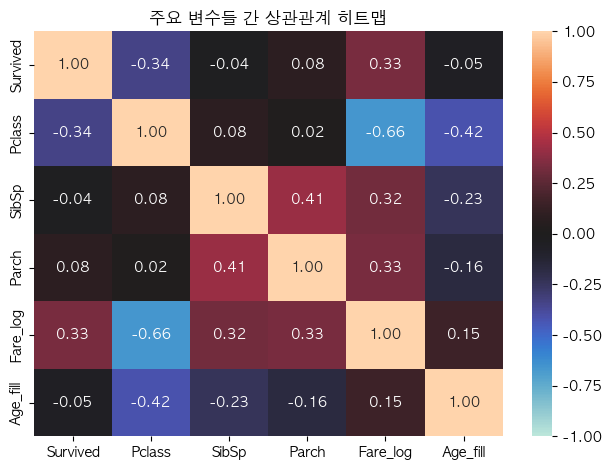

In [81]:
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0)
plt.title("주요 변수들 간 상관관계 히트맵")
plt.tight_layout()
plt.show()

/var/folders/xr/h3sspt_54ygby4y5666yc_380000gn/T/ipykernel_16575/3211264126.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=surv_corr.values, y=surv_corr.index, palette="Blues_r")


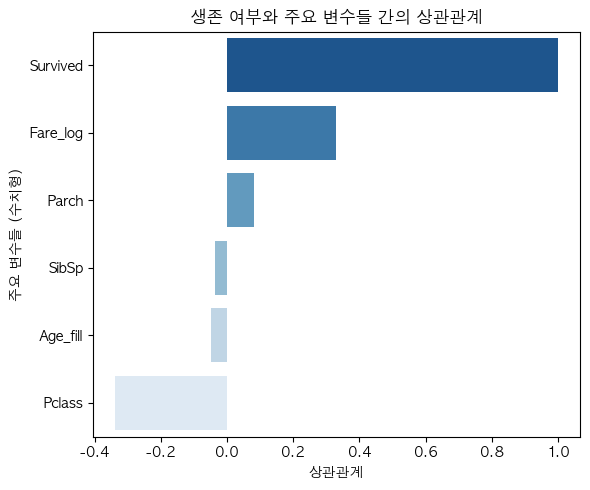

In [ ]:
# Survived와 다른 변수들의 상관계수 막대그래프로 시각화
num = titanic[['Survived','Pclass', 'SibSp', 'Parch', 'Fare_log', 'Age_fill']]
corr = num.corr()

surv_corr = corr['Survived'].sort_values(ascending=False)

plt.figure(figsize=(6,5))
sns.barplot(x=surv_corr.values, y=surv_corr.index, palette="Blues_r")
plt.title("생존 여부와 주요 변수들 간의 상관관계")
plt.xlabel("상관관계")
plt.ylabel("주요 변수들 (수치형)")
plt.tight_layout()
plt.show()

#### 해석

- 생존(Survived)과의 상관관계
  - Fare_log(+0.33) → 티켓 요금이 높을수록 생존 확률 증가
  - Pclass(–0.34) → 객실 등급이 좋을수록 생존 확률 증가 (Pclass 숫자가 낮을수록 상위등급이므로 상관관계가 음수)
  - 타이타닉 데이터에서 가장 중요한 설명변수들은: 티켓 요금과 객실 등급

## 추가 분석 (생존 vs 티켓 요금 상관관계)

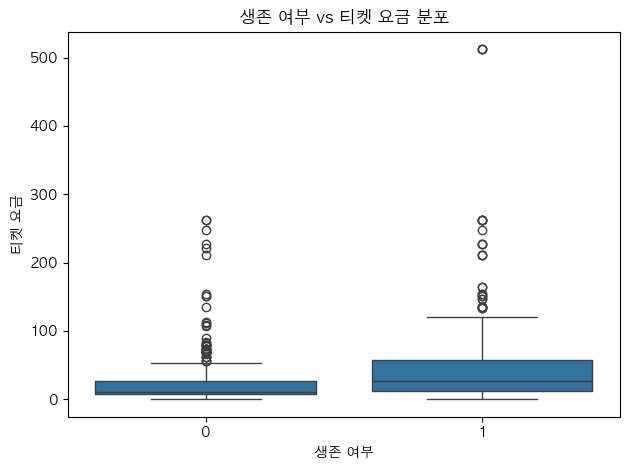

In [116]:
# 생존 여부 vs 티켓 요금 분포 (티켓 요금 로그변환 전)
sns.boxplot(data=titanic, x=titanic['Survived'], y=titanic['Fare'])
plt.title('생존 여부 vs 티켓 요금 분포')
plt.xlabel('생존 여부')
plt.ylabel('티켓 요금')
plt.tight_layout()
plt.show()

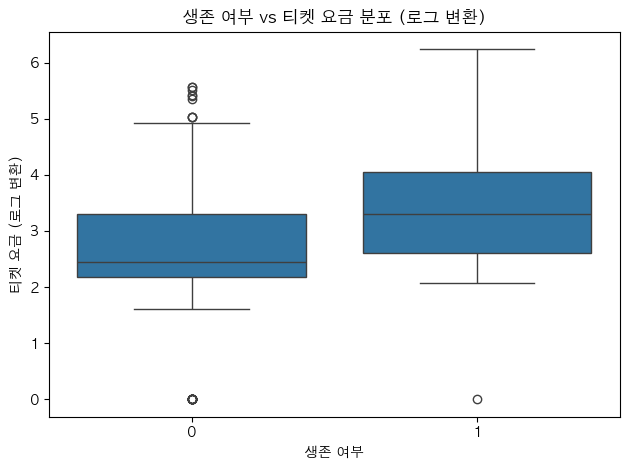

In [ ]:
# 생존 여부 vs 티켓 요금(로그 변환) 분포
sns.boxplot(data=titanic, x=titanic['Survived'], y=titanic['Fare_log1p'])
plt.title('생존 여부 vs 티켓 요금 분포 (로그 변환)')
plt.xlabel('생존 여부')
plt.ylabel('티켓 요금 (로그 변환)')
plt.tight_layout()
plt.show()

## boxplot + swarmplot 시각화

- boxplot = 분포 차이
- swarmplot = 개별 관측치 분포

/var/folders/xr/h3sspt_54ygby4y5666yc_380000gn/T/ipykernel_3494/4294851816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


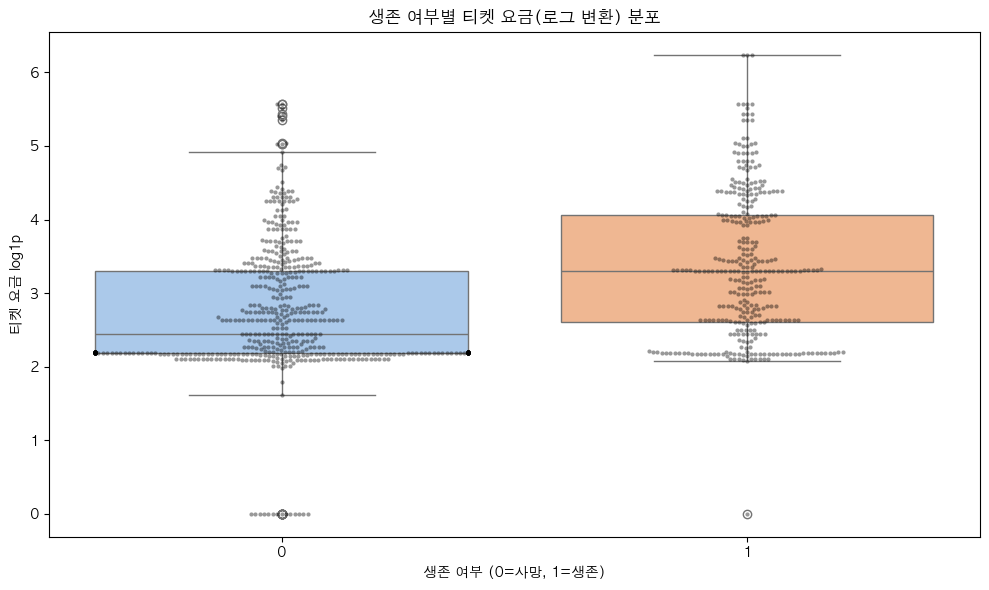

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=titanic,
    x='Survived',
    y='Fare_log1p',
    palette='pastel'
)

sns.swarmplot(
    data=titanic,
    x='Survived',
    y='Fare_log1p',
    color='black',
    size=3,
    alpha=0.4
)

plt.title('생존 여부별 티켓 요금(로그 변환) 분포')
plt.xlabel('생존 여부 (0=사망, 1=생존)')
plt.ylabel('티켓 요금 log1p')
plt.tight_layout()
plt.show()

## stripplot

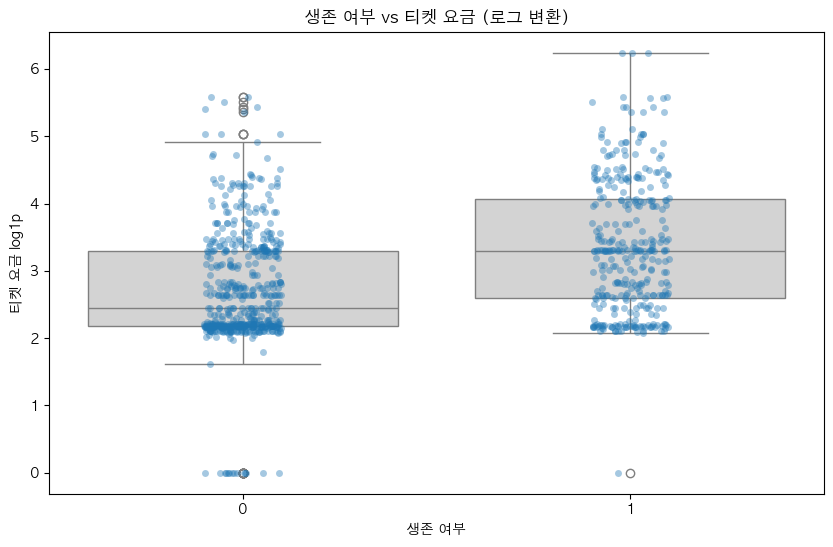

In [120]:
plt.figure(figsize=(10,6))

sns.boxplot(data=titanic, x='Survived', y='Fare_log1p', color='lightgray')
sns.stripplot(
    data=titanic,
    x='Survived',
    y='Fare_log1p',
    jitter=True,
    alpha=0.4
)

plt.title('생존 여부 vs 티켓 요금 (로그 변환)')
plt.xlabel('생존 여부')
plt.ylabel('티켓 요금 log1p')
plt.show()


## 로지스틱 회귀

생존 확률 vs 티켓 요금 관계

In [ ]:
# 로지스틱 회귀 (티켓 요금(로그 변환 기준) → 생존 확률 예측)
import statsmodels.api as sm
import numpy as np

# 결측 제거
df = titanic[['Survived', 'Fare_log1p']].dropna()

# X, y 정의
X = df['Fare_log1p']
y = df['Survived']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

# 오즈비 계산
odds_ratio = np.exp(result.params)
print("\n===== Odds Ratio =====")
print(odds_ratio)


Optimization terminated successfully.
         Current function value: 0.608890
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Nov 2025   Pseudo R-squ.:                 0.08563
Time:                        18:55:48   Log-Likelihood:                -542.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.748e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8187      0.265    -10.648      0.000      -3.338      -2.300
Fare_log1p     0.7766      0.

### 해석

- R-squared = 0.0856 → 설명력 있음
- p-value가 거의 0 → 통계적으로 매우 유의
- 오즈비 2.17 → 요금(log)이 1 증가하면 생존 확률이 약 2.17배로 증가
- 티켓 요금(log 변환)이 높을수록 생존 확률이 유의하게 증가함
  - 즉, 돈 많이 낸 티켓을 가진 승객이 더 많이 살아남음

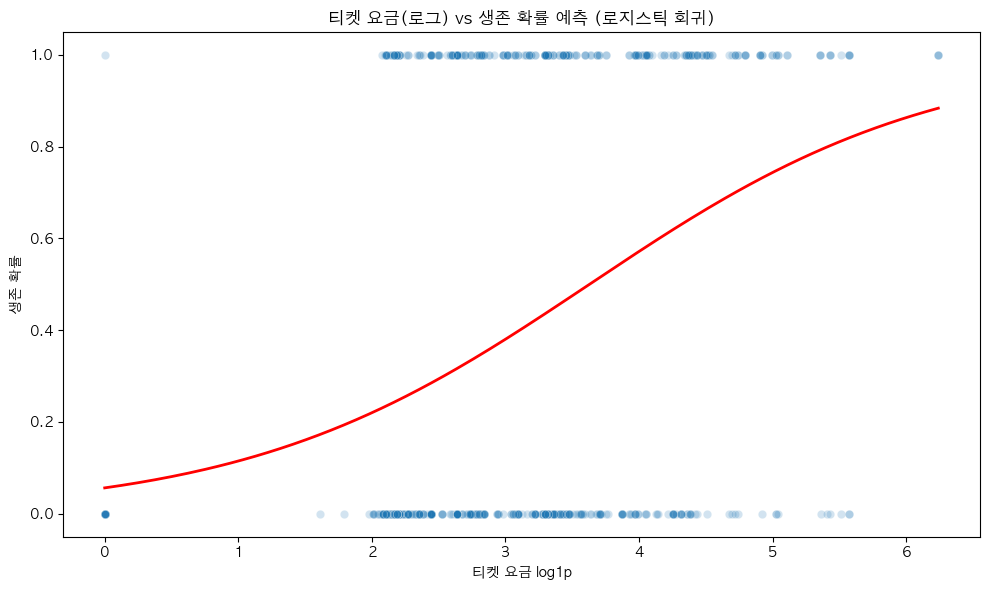

In [ ]:
# 로지스틱 회귀 시각화
import numpy as np
import statsmodels.api as sm

df = titanic[['Survived', 'Fare_log1p']].dropna()

# 로지스틱 회귀
X = sm.add_constant(df['Fare_log1p'])
y = df['Survived']
model = sm.Logit(y, X).fit(disp=False)

# 예측용 곡선
xs = np.linspace(df['Fare_log1p'].min(), df['Fare_log1p'].max(), 200)
X_pred = sm.add_constant(xs)
ys = model.predict(X_pred)

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Fare_log1p'], y=df['Survived'], alpha=0.2)
plt.plot(xs, ys, color='red', linewidth=2)

plt.title('티켓 요금(로그) vs 생존 확률 예측 (로지스틱 회귀)')
plt.xlabel('티켓 요금 log1p')
plt.ylabel('생존 확률')
plt.tight_layout()
plt.show()
